<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первый-взгляд-на-данные" data-toc-modified-id="Первый-взгляд-на-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первый взгляд на данные</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Категоризация" data-toc-modified-id="Категоризация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Категоризация</a></span></li><li><span><a href="#Удаление-столбцов" data-toc-modified-id="Удаление-столбцов-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Удаление столбцов</a></span></li><li><span><a href="#Вывод-по-этапу" data-toc-modified-id="Вывод-по-этапу-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод по этапу</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-типов-объектов" data-toc-modified-id="Изучение-типов-объектов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение типов объектов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-расположения-объектов" data-toc-modified-id="Изучение-расположения-объектов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучение расположения объектов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></div>

# Исследование рынка ресторанов Москвы

## Первый взгляд на данные

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from dadata import Dadata
token = "****" #скрыт в целях безопасности, использовался бесплатный аккаунт
dadata = Dadata(token)
m = Mystem() 

In [2]:
plt.style.use('seaborn-dark')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
df = pd.read_csv('/datasets/rest_data.csv')
display(df.head(5))
df.info()
df.describe().T

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,count,mean,std,min,25%,50%,75%,max
id,"15,366.00","119,720.07","73,036.13",838.00,"28,524.00","144,974.50","184,262.25","223,439.00"
number,"15,366.00",59.55,74.74,0.00,12.00,40.00,80.00,"1,700.00"


### Вывод

- Выборка довольно значительная - 15 тысяч значений. Этого достаточно для проведения качественного исследования
- Предполагается, что столбец `id` является уникальным индентификатором записи, можно использовать для проверки дублей
- Явных пропусков не выявлено, необходимо проверить неявные
- Требуется проверить нулевые показатели столбца `number`
- Столбцы `object_name` `id` `address` не пригодятся для исследовательского анализа, но нужны для предобработки данных

## Предобработка данных

### Пропуски

Проверим на наличие пропусков категориальные столбцы важные для исследования, путем отображения уникальных значений.

In [4]:
df.chain.unique()

array(['нет', 'да'], dtype=object)

In [5]:
df.object_type.unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Похоже все в порядке, значения предстоит переименовать на более удобные для анализа. Теперь проверим нулевые показатели столбца `number`. Гипотеза в том, что эти значения указывают на точки продажи еды без посадочных мест, например закусочные, кулинарии и т.п.

In [6]:
print(df.query('number == 0').object_type.unique())
print()
df.query('number == 0').info()

['закусочная' 'предприятие быстрого обслуживания' 'столовая' 'кафетерий'
 'кафе' 'магазин (отдел кулинарии)' 'буфет' 'бар' 'ресторан']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621 entries, 137 to 15338
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1621 non-null   int64 
 1   object_name  1621 non-null   object
 2   chain        1621 non-null   object
 3   object_type  1621 non-null   object
 4   address      1621 non-null   object
 5   number       1621 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 88.6+ KB


Гипотеза не подтвердилась, нулевые значения присутствуют во всех типах `object_type`. Удалять все нулевые значения не хочется, это 10% от всех данных. Посмотрим на очевидные ошибки - "нулевая" посадка не может быть в столовых и ресторанах.

In [7]:
objects = ['столовая', 'ресторан']
df.query('number == 0 and object_type in @objects')

,id,object_name,chain,object_type,address,number
206,150836,ГБОУ Школа №1468,нет,столовая,"город Москва, Волгоградский проспект, дом 17, ...",0
1873,79718,Макдоналдс,да,ресторан,"город Москва, поселение Московский, деревня Го...",0
2101,29844,Вкусный выбор,нет,столовая,"город Москва, аллея Жемчуговой, дом 1А",0
2130,152335,Пищеблок ( закрытое),нет,столовая,"город Москва, Ленинский проспект, дом 8, корпу...",0
2675,23137,Самса Хаус,нет,столовая,"город Москва, Широкая улица, дом 12",0
...,...,...,...,...,...,...
15084,214843,CoffeeShop,да,ресторан,"город Москва, Кутузовский проспект, дом 57",0
15105,219032,Бургер Кинг,да,ресторан,"город Москва, улица Вавилова, дом 3",0
15108,210192,Бургер Кинг,да,ресторан,"город Москва, поселение Московский, Киевское ш...",0
15236,219130,KFC,да,ресторан,"город Москва, улица Вавилова, дом 3",0


По этой выборке видно несколько ошибок:
- Неверное определение типа объекта с точки зрения бизнес-модели. Макдоналдс, KFC и Бургер-кинг являются фаст-фудом, но попадают в категорию ресторанов, а CoffeeShop - кафе.
- Некоторые записи, например про школьную столовую, очевидно имеют ошибку по столбцу `number`, другие могут быть частью фуд-корта или точки обслуживания на вынос и ошибка наблюдается скорее в категории.

Похоже это общие ошибки по выборке. При исследовании конкретных параметров и если выбросы будут влиять на общую кратину, от части данных в срезах можно избавиться.

Также обнаружены записи, где указано, что заведение закрыто. От таких данных следует избавиться сейчас.

In [8]:
def find_closed(data):
    name = data['object_name']
    lemma = m.lemmatize(name)
    
    if 'закрывать' in lemma:
        return 'закрыто'
    elif 'закрытый' in lemma:
        return 'закрыто'
    else:
        return 'открыто'
    

In [9]:
df['is_open'] = df.apply(find_closed, axis = 1)
df.query('is_open == "закрыто"')

,id,object_name,chain,object_type,address,number,is_open
1998,152530,Столовая (закрытое),нет,столовая,"город Москва, Ленинский проспект, дом 8, корпус 5",50,закрыто
2115,153655,Столовая (закрытое),нет,столовая,"город Москва, Ленинский проспект, дом 4, строе...",40,закрыто
2118,26520,Ассамблея (закрытое),нет,ресторан,"город Москва, улица Большая Якиманка, дом 24",60,закрыто
2119,26521,Якиманка (закрытое),нет,ресторан,"город Москва, улица Большая Якиманка, дом 24",156,закрыто
2120,20481,Аврора (закрытое),нет,бар,"город Москва, улица Большая Якиманка, дом 24",102,закрыто
2121,27889,Столовая (закрытое),нет,столовая,"город Москва, Ленинский проспект, дом 9",80,закрыто
2130,152335,Пищеблок ( закрытое),нет,столовая,"город Москва, Ленинский проспект, дом 8, корпу...",0,закрыто
3066,28222,Бар (закрытое),нет,буфет,"город Москва, Пыжёвский переулок, дом 5, строе...",30,закрыто
3074,153656,Столовая (закрытое),нет,столовая,"город Москва, Ленинский проспект, дом 6, строе...",60,закрыто
3075,153670,Студент (закрытое),нет,кафе,"город Москва, Ленинский проспект, дом 6, строе...",50,закрыто


Вот и наши закрытые заведения, они нам не нужны. Удаляем.

In [10]:
df = df.query('is_open == "открыто" or id == 159345')
df.query('is_open == "закрыто"')

,id,object_name,chain,object_type,address,number,is_open
8936,159345,ЗАКРЫТЫЙ КЛУБ «ГАРАЖ»,нет,бар,"город Москва, улица Лётчика Бабушкина, дом 1, ...",20,закрыто


**Вывод**

- Явных пропусков не обнаружено
- В категориальных столбцах пропусков не обнаружено
- Обнаружено странное поведение данных в столбце `number`, некоторые категории по определению не могут иметь значение столбца `number` равным нулю. 
- Обнаружены ошибки в заполнении столбца `object_type` с точки зрения бизнес-модели заведения. Похоже, что значения заполнялись по формальному признаку, например из учредительных или регистрационных документов 

Принято решение оставить как есть и избавиться от данных на этапе исследовательского анализа, если в этом будет необходимость.

- Удалены значения с закрытми заведениями

### Типы данных

Поменяем неудобные названия "магазин (отдел кулинарии)" и "предприятие быстрого обслуживания" на "кулинария" и "фаст фуд" соответственно в столбце `object_type`

In [11]:
df.loc[df['object_type'] == 'магазин (отдел кулинарии)', 'object_type'] = 'кулинария'
df.loc[df['object_type'] == 'предприятие быстрого обслуживания', 'object_type'] = 'фаст фуд'
df.object_type.unique()

array(['кафе', 'столовая', 'закусочная', 'фаст фуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

Также поменяем значения "да" и "нет" на "сетевое" и "не сетевое" в столбце `chain` для улучшения визуальной составляющей графиков и сводных таблиц

In [12]:
df.loc[df['chain'] == 'да', 'chain'] = 'сетевое'
df.loc[df['chain'] == 'нет', 'chain'] = 'не сетевое'
df.head(5)

,id,object_name,chain,object_type,address,number,is_open
0,151635,СМЕТАНА,не сетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,открыто
1,77874,Родник,не сетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,открыто
2,24309,Кафе «Академия»,не сетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,открыто
3,21894,ПИЦЦЕТОРИЯ,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,открыто
4,119365,Кафе «Вишневая метель»,не сетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,открыто


Также проведем оптимизацию использования памяти и поменяем типы данных на более подходящие

In [13]:
df.info(verbose = False, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15338 entries, 0 to 15365
Columns: 7 entries, id to is_open
dtypes: int64(2), object(5)
memory usage: 8.9 MB


In [14]:
df['chain'] = df['chain'].astype('category')
df['object_type'] = df['object_type'].astype('category')
df['number'] = df['number'].astype('uint8')
df['id'] = df['id'].astype('str')

In [15]:
df.info(verbose = False, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15338 entries, 0 to 15365
Columns: 7 entries, id to is_open
dtypes: category(2), object(4), uint8(1)
memory usage: 6.6 MB


**Вывод**

- В столбце `object_type` поменяли значение "магазин (отдел кулинарии)" на "кулинария" и "предприятие быстрого обслуживания" на "фаст фуд"
- В столбце `chain` поменяли значение "да" на "сетевое" и значение "нет" на "не сетевое"
- Провели оптимизацию использования памяти, заменив типы значения на более подходящие

### Дубликаты

In [16]:
df.id.value_counts()

159701    1
183982    1
24829     1
204874    1
190380    1
         ..
175506    1
27511     1
222746    1
22806     1
153355    1
Name: id, Length: 15338, dtype: int64

Айди уникальные, дубликатов по ним. Посмотрим на данные без столбца айди на предмет явных дубликатов в остальных данных.

In [17]:
df[df.drop(columns = ['id']).duplicated()]

,id,object_name,chain,object_type,address,number,is_open
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,не сетевое,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100,открыто
3481,20914,Буфет Мади,не сетевое,буфет,"город Москва, Ленинградский проспект, дом 64",40,открыто
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,не сетевое,буфет,"город Москва, Беловежская улица, дом 67",100,открыто
4537,23391,Столовая «Комбинат питания КОСМОС»,не сетевое,столовая,"город Москва, Новозаводская улица, дом 12/11",15,открыто
5059,20021,LIFT,не сетевое,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20,открыто
...,...,...,...,...,...,...,...
14578,222932,Старый Баку,не сетевое,кафе,"город Москва, Кировоградская улица, владение 15А",120,открыто
14596,204947,Буфет при кинотеатре,не сетевое,буфет,"город Москва, Ореховый бульвар, дом 22А",0,открыто
14844,219518,Sushi-Make,не сетевое,фаст фуд,"город Москва, Ярцевская улица, дом 19",0,открыто
15173,218542,Кофе с собой,сетевое,фаст фуд,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0,открыто


Найдено 82 строки с дубликатами. Удалим их

In [18]:
df = df[~df.drop(columns = ['id']).duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15256 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           15256 non-null  object  
 1   object_name  15256 non-null  object  
 2   chain        15256 non-null  category
 3   object_type  15256 non-null  category
 4   address      15256 non-null  object  
 5   number       15256 non-null  uint8   
 6   is_open      15256 non-null  object  
dtypes: category(2), object(4), uint8(1)
memory usage: 641.1+ KB


**Вывод**

- Дубликаты по столбцу `id` не обнаружены
- Удалено 82 строки явных дубликатов

### Категоризация

Необходимо создать столбец с названием улицы для исследовательского анализа. Самый простой способ - разделить значения столбца `address` по запятой и заполнить новый столбец вторым значением из массива. Для такого способа, первое значение массива должно иметь название города, как мы это видели во всех выборках выше. Посмотрим на те значения, где в начале адреса не указывается "город Москва"

In [19]:
df[df['address'].apply(lambda x: x.split(r',')[0]) != 'город Москва']

,id,object_name,chain,object_type,address,number,is_open
859,23601,Буфет - ГБОУ СОШ № 64,не сетевое,буфет,"Партизанская улица, дом 30",100,открыто
860,23604,Буфет - ГБОУ 60,не сетевое,буфет,"Партизанская улица, дом 30",100,открыто
1491,25349,Ресторан «Гранатовый сад»,не сетевое,ресторан,"Поречная улица, дом 5/14, строение 1",40,открыто
7691,132359,Кафе «La Carotte»,не сетевое,кафе,"1-й Нагатинский проезд, дом 10",198,открыто
7938,25019,КЛУБ ВЫСОЦКОГО,не сетевое,кафе,"Нижний Таганский тупик, дом 3, строение 1",94,открыто
...,...,...,...,...,...,...,...
13185,192918,Limassol,не сетевое,кафе,"Бауманская улица, дом 7, строение 3",42,открыто
13399,204788,Крошка Картошка,сетевое,фаст фуд,"Солянский тупик, дом 1/4, строение 1",15,открыто
13991,204917,Шаурма на углях- Чайхана Баракат,не сетевое,кафе,"Таганская площадь, дом 88, строение 4",80,открыто
14003,211986,FRESH CAFE,не сетевое,кафе,"Шарикоподшипниковская улица, дом 5, строение 1",42,открыто


Найдено 70 записей, где название города пропущено. Судя по названиям улиц, они скорее всего находятся в Москве, однако это только гипотеза, которую нельзя быстро проверить. Адрес может относится к любому городу или поселению. Данных немного, надежнее их удалить.

In [20]:
df = df[df['address'].apply(lambda x: x.split(r',')[0]) == 'город Москва']
df[df['address'].apply(lambda x: x.split(r',')[0]) != 'город Москва']

,id,object_name,chain,object_type,address,number,is_open


Теперь создадим столбец с названием улицы и посмотрим на топ-10, которые нам предстоит исследовать далее

In [21]:
df['street'] = df['address'].apply(lambda x: x.split(r', ')[1])
df.street.value_counts().head(10)

город Зеленоград          232
проспект Мира             204
Профсоюзная улица         181
Ленинградский проспект    170
Пресненская набережная    167
Варшавское шоссе          161
поселение Сосенское       137
Ленинский проспект        135
проспект Вернадского      128
Кутузовский проспект      114
Name: street, dtype: int64

Обнаружены значения, ценность которых с точки зрения исследования улиц Москвы сомнительна, например топ-1 занимает город Зеленоград. Будем разбираться с этими данными во время исследования, пока оставим все как есть, что бы не тяреть данные.

**Вывод**

- Удалили значения, где не указано явно, что адрес находится в Москве
- Добавили столбец `street` со значениями улиц
- В значениях `street` обнаружено указания на города, входящие в состав Москвы, например Зеленоград. Принято решение оставить данные как есть и обрабатывать их дополнительно на этапе исследования, если в этом возникнет необходимость

### Удаление столбцов

In [22]:
df = df.drop(columns = ['object_name', 'id', 'address', 'is_open'])
df.head(5)

,chain,object_type,number,street
0,не сетевое,кафе,48,улица Егора Абакумова
1,не сетевое,кафе,35,улица Талалихина
2,не сетевое,кафе,95,Абельмановская улица
3,сетевое,кафе,40,Абрамцевская улица
4,не сетевое,кафе,50,Абрамцевская улица


**Вывод**

Удалены ненужные для исследования столбцы: 
- `object_name`
- `id`
- `address`
- `is_open`

### Вывод по этапу

Не обнаружено:
- Явных пропусков не обнаружено
- В категориальных столбцах пропусков не обнаружено
- Явные дубликаты не обнаружены
- Дубликаты по столбцу `id` не обнаружены

Проблемы с данными:
- Обнаружено странное поведение данных в столбце `number`, некоторые категории по определению не могут иметь значение столбца `number` равным нулю. 
- Обнаружены ошибки в заполнении столбца `object_type` с точки зрения бизнес-модели заведения. Похоже, что значения заполнялись по формальному признаку, например из учредительных или регистрационных документов 
- В значениях `street` обнаружено указания на города, входящие в состав Москвы, например Зеленоград. Принято решение оставить данные как есть и обрабатывать их дополнительно на этапе исследования, если в этом возникнет необходимость


Удалено:
- Удалены значения с закрытми заведениями
- Удалили значения, где не указано явно, что адрес находится в Москве
- Столбцы `object_name` `id` `address`

Заменено:
- В столбце `object_type` поменяли значение "магазин (отдел кулинарии)" на "кулинария" и "предприятие быстрого обслуживания" на "фаст фуд"
- В столбце `chain` поменяли значение "да" на "сетевое" и значение "нет" на "не сетевое"
- Провели оптимизацию использования памяти, заменив типы значения на более подходящие

Добавлено:
- Добавилен столбец `street` со значениями улиц

## Анализ данных

### Изучение типов объектов

Требуется исследовать соотношение видов объектов общественного питания по количеству и построить график.

Сначала посмотрим на цифровые значения и определим соотношение.

In [23]:
object_type_counts = pd.pivot_table(df,
                                    index = 'object_type', 
                                    values = 'chain', 
                                    aggfunc = 'count').reset_index().sort_values(by = 'chain', ascending = False)
object_type_counts = object_type_counts.rename(columns = {'chain': 'counts'})
object_type_counts['ratio'] = round(object_type_counts.counts / object_type_counts.counts.sum() * 100, 1)
object_type_counts

,object_type,counts,ratio
3,кафе,6034,39.70
7,столовая,2557,16.80
6,ресторан,2264,14.90
8,фаст фуд,1894,12.50
0,бар,851,5.60
1,буфет,572,3.80
4,кафетерий,393,2.60
2,закусочная,349,2.30
5,кулинария,272,1.80


Более 80% всех заведений Москвы по документам значатся как кафе, столовая, ресторан или предприятие быстрого питания (фастфуд), при этом кафе больше всего - 6 тысяч заведений. 

Почти 10% заведений называются баром и буфетом и остальные 7% заведений числятся как кафетерии, закусочные и кулинарии, при этом кулинарий меньше всех - 272 штуки.

Посмотрим на график.

Text(0, 0.5, 'Количество объектов')

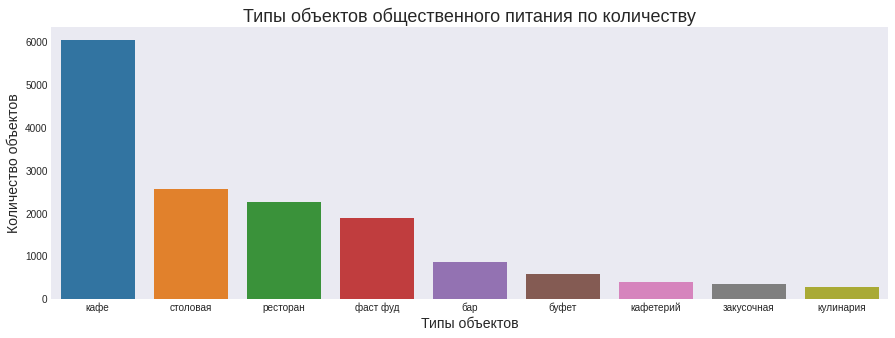

In [24]:
order_cols = list(object_type_counts['object_type'])
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'object_type', y = 'counts', data = object_type_counts, order = order_cols)
ax.set_title('Типы объектов общественного питания по количеству', fontsize = 18)
ax.set_xlabel('Типы объектов', fontsize = 14)
ax.set_ylabel('Количество объектов', fontsize = 14)

Теперь посмотрим на соотношение сетевых и не сетевых объектов общественного питания по количеству.

In [25]:
chain_counts = pd.pivot_table(df,
                                    index = 'chain', 
                                    values = 'street', 
                                    aggfunc = 'count').reset_index().sort_values(by = 'street', ascending = False)
chain_counts = chain_counts.rename(columns = {'street': 'counts'})
chain_counts['ratio'] = round(chain_counts.counts / chain_counts.counts.sum() * 100, 1)
chain_counts

,chain,counts,ratio
0,не сетевое,12234,80.60
1,сетевое,2952,19.40


Соотношение не сетевых и сетевых заведений 80% на 20% соответственно. Построим график.

Text(0, 0.5, 'Количество объектов')

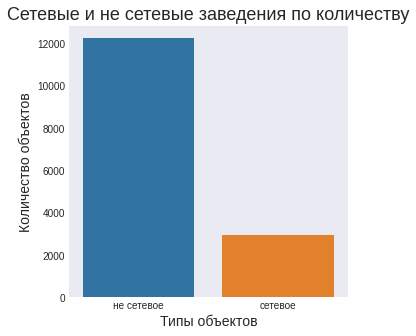

In [26]:
order_cols = list(chain_counts['chain'])
plt.figure(figsize = (5,5))
ax = sns.barplot(x = 'chain', y = 'counts', data = chain_counts, order = order_cols)
ax.set_title('Сетевые и не сетевые заведения по количеству', fontsize = 18)
ax.set_xlabel('Типы объектов', fontsize = 14)
ax.set_ylabel('Количество объектов', fontsize = 14)

Техническим заданием к исследованию требуется ответить на вопрос - для какого типа заведений характерно сетевое распространение. Для этого построим сводную таблицу.

In [27]:
object_types_to_chain = pd.pivot_table(df,
                                      index = 'object_type',
                                      values = 'street',
                                      columns = 'chain',
                                      aggfunc = 'count')
object_types_to_chain
object_types_to_chain.columns = ['not_chain', 'chain']
object_types_to_chain = object_types_to_chain.reset_index().sort_values(by = 'not_chain', ascending = False)
object_types_to_chain['total'] = object_types_to_chain['not_chain'] + object_types_to_chain['chain']
object_types_to_chain['not_chain_ratio'] = round(object_types_to_chain['not_chain'] / object_types_to_chain['total'] * 100, 1)
object_types_to_chain['chain_ratio'] = round(object_types_to_chain['chain'] / object_types_to_chain['total'] * 100, 1)
object_types_to_chain

,object_type,not_chain,chain,total,not_chain_ratio,chain_ratio
3,кафе,4644,1390,6034,77.00,23.00
7,столовая,2554,3,2557,99.90,0.10
6,ресторан,1723,541,2264,76.10,23.90
8,фаст фуд,1110,784,1894,58.60,41.40
0,бар,814,37,851,95.70,4.30
1,буфет,561,11,572,98.10,1.90
4,кафетерий,341,52,393,86.80,13.20
2,закусочная,293,56,349,84.00,16.00
5,кулинария,194,78,272,71.30,28.70


Самая популярная категория заведений - кафе, имеет соотношение сетевых и не сетевых заведений близкое к показателю по общей выборке со смещением в сторону сетевых - 23% на 77% при показателе на выборку 20% на 80%. Схожую динамику показывает категория ресторанов - 24% на 76%. 

Столовые, которые занимают второе место по количеству заведений практически на 100% состоят из не сетевых заведений. Похожую динамику показывают бары и буфеты, которых около 10% от всей выборки, показывают 96% и 98% для не сетевых против 4% и 2% для сетевых соответственно. 

Фаст фуд (заведения быстрого питания) показывают самое сбалансированное соотношение - 59% для не сетевых заведений и 41% для сетевых. 

Кафетерии, закусочные и кулинарии, находящиеся в конце рейтинга по количеству заведений в целом не сильно выбиваются из статистики по общей выборке, кроме кулинарии, по этой категории наблюдается смещение в сторону сетевых заведений - почти 29% против 71% для не сетевых. 

Отвечая на вопрос кейса - сетевое распространение характернее всего для фаст-фуда, больше всего среди всех сетевых заведений кафе, фаст фуда и ресторанов.

Теперь ответим на вопрос - что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? Исследуем количество посадочных мест для сетевых и не сетевых заведений в обозначенных выше категориях.

In [28]:
avg_number = pd.pivot_table(df,
                            index = 'object_type',
                            values = ('number', 'street'),
                            columns = 'chain',
                            aggfunc = {'number': 'mean','street': 'count'})
avg_number.columns = ['not_chain', 'chain', 'to_del', 'to_sort']
avg_number = avg_number.sort_values(by = 'to_sort', ascending = False)
avg_number = avg_number.drop(columns = ['to_sort', 'to_del'])
avg_number

,not_chain,chain
object_type,,
кафе,36.81,46.00
фаст фуд,6.96,38.68
ресторан,82.24,89.85
кулинария,4.38,8.68
закусочная,6.57,14.38
кафетерий,8.67,12.27
бар,40.51,53.03
буфет,49.97,12.73
столовая,113.43,112.33


Для фаст фуда ответ очевиден, сетевой бизнес предпочитает открывать меньше заведений с большим количесвтом посадочных мест. 

Для кафе и ресторанов видно, что сетевой бизнес предпочитает открывать точки с большим количеством мест, однако разница не столь велика, в среднем посадочных мест для сетевых точек больше на 27% и 8% соответственно. 

Теперь изучим количество посадочных мест по всей выборке.

In [29]:
avg_number_total = pd.pivot_table(df,
                                 index = 'object_type',
                                 values = 'number',
                                 aggfunc = 'mean').reset_index().sort_values(by = 'number', ascending = False)
avg_number_total['number'] = avg_number_total['number'].astype('uint8')
avg_number_total

,object_type,number
7,столовая,113
6,ресторан,84
1,буфет,49
0,бар,41
3,кафе,38
8,фаст фуд,20
4,кафетерий,9
2,закусочная,7
5,кулинария,5


Больше всего посадочных мест в среднем наблюдается среди столовых и буфетов, 113 и 84 соответственно. Буфеты, бары и кафе имеют похожу статистику от 38 до 48 мест в среднем. Меньше всего мест у кафетериев, закусочных и кулинарий от 5 до 9. 

Теперь посмотрим на график

Text(0, 0.5, 'Количество посадочных мест')

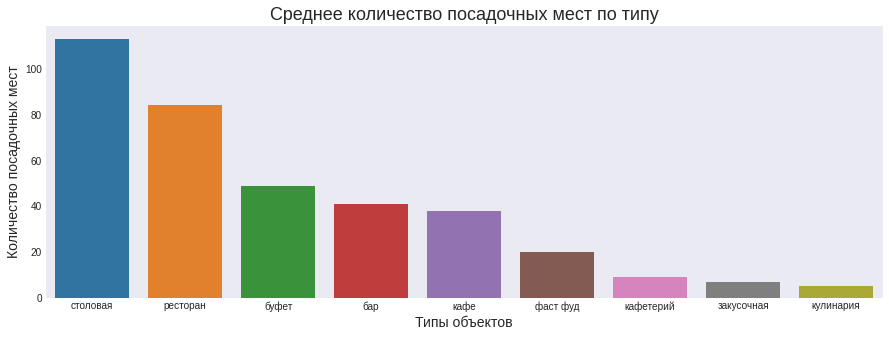

In [30]:
order_cols = list(avg_number_total['object_type'])
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'object_type', y = 'number', data = avg_number_total, order = order_cols)
ax.set_title('Среднее количество посадочных мест по типу', fontsize = 18)
ax.set_xlabel('Типы объектов', fontsize = 14)
ax.set_ylabel('Количество посадочных мест', fontsize = 14)

#### Вывод

- Более 80% всех заведений Москвы по документам значаться как кафе, столовая, ресторан или предприятие быстрого питания (фастфуд), при этом кафе больше всего - 6 тысяч заведений. 
- Почти 10% заведений называются баром и буфетом и остальные 7% заведений числятся как кафетерии, закусочные и кулинарии, при этом кулинарий меньше всего - 272 штуки.


- Сетевое распространение характернее всего для фаст-фуда, больше всего среди всех сетевых заведений кафе, фаст фуда и ресторанов.
- Соотношение не сетевых и сетевых заведений 80% на 20% соответственно.
- Кафе имеют соотношение сетевых и не сетевых заведений близкое к показателю по общей выборке со смещением в сторону сетевых - 23% на 77%.
- Схожую динамику показывает категория ресторанов - 24% на 76%. 
- Столовые практически на 100% состоят из не сетевых заведений. 
- Похожую динамику показывают бары и буфеты - 96% и 98% для не сетевых против 4% и 2% для сетевых соответственно. 
- Фаст фуд (заведения быстрого питания) показывают самое сбалансированное соотношение - 59% для не сетевых заведений и 41% для сетевых. 
- Кафетерии, закусочные и кулинарии, находящиеся в конце рейтинга по количеству заведений в целом не сильно выбиваются из статистики по общей выборке, кроме кулинарии, по этой категории наблюдается смещение в сторону сетевых заведений - почти 29% против 71% для не сетевых. 


- Для фаст фуда сетевой бизнес предпочитает открывать меньше заведений с большим количеством посадочных мест - 7 посадочных мест в среднем для не сетевых заведений и 38 для сетевых.
- Для кафе и ресторанов сетевой бизнес также предпочитает открывать точки с большим количеством мест, однако разница не столь велика, в среднем посадочных мест для сетевых точек больше на 27% и 8% соответственно. 
- Больше всего посадочных мест в среднем наблюдается среди столовых и буфетов, 113 и 84 соответственно. 
- Буфеты, бары и кафе имеют похожу статистику от 38 до 48 мест в среднем. 
- Меньше всего мест к кафетериев, закусочных и кулинарий от 5 до 9. 

### Изучение расположения объектов

Вернемся к вопросу об улицах. Топ-10 улицам, где расположены объекты общественного питания сейчас выглядит так:

In [31]:
df.street.value_counts().head(10)

город Зеленоград          232
проспект Мира             204
Профсоюзная улица         181
Ленинградский проспект    170
Пресненская набережная    167
Варшавское шоссе          161
поселение Сосенское       137
Ленинский проспект        135
проспект Вернадского      128
Кутузовский проспект      114
Name: street, dtype: int64

Зеленоград конечно является формально частью Москвы, но по факту нас скорее интересуют локации находящиеся в пределах МКАДа. Также если бы мы выделили из записи об адресе улицы или районе Зеленограда, они бы скорее всего не попали в список топ-10. Создадим срез и исследуем его.

In [32]:
df_streets = df.query('street != "город Зеленоград" and street != "поселение Сосенское"')
top_streets = df_streets.street.value_counts().head(10).index
df_streets.street.value_counts().head(10)

проспект Мира             204
Профсоюзная улица         181
Ленинградский проспект    170
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        135
проспект Вернадского      128
Кутузовский проспект      114
Каширское шоссе           111
Кировоградская улица      108
Name: street, dtype: int64

Теперь выполним пункт технического задания, где требуется определить районы, в которых находятся рассматриваемые улицы. Так как только по названию улицы невозможно определить район (несколько домов на одной улице могут находится в разных районах) используем адрес для каждой улице с домом номер 1.

In [33]:
streets_list = list(df_streets.street.value_counts().head(10).index)
df_streets_pivot = pd.pivot_table(df_streets,
                                  index = 'street',
                                  values = 'chain',
                                  aggfunc = 'count').reset_index().sort_values(by = 'chain', ascending = False).head(10)
df_streets_pivot.columns = ['street', 'count']

col = []
for street in streets_list:
    result = dadata.suggest("address", f"Москва {street} д1")
    district = result[0]['data']['divisions']['administrative']['city_district']['name']
    col.append(district)
df_streets_pivot['district'] = col
df_streets_pivot

,street,count,district
1398,проспект Мира,204,Марьина роща
991,Профсоюзная улица,181,Ясенево
681,Ленинградский проспект,170,Сокол
977,Пресненская набережная,167,Пресненский
405,Варшавское шоссе,161,Нагорный
684,Ленинский проспект,135,Теплый Стан
1395,проспект Вернадского,128,Раменки
672,Кутузовский проспект,114,Дорогомилово
598,Каширское шоссе,111,Орехово-Борисово Северное
603,Кировоградская улица,108,Чертаново Южное


Проспект Мира - очень длинная улица, расположенная на севере Москвы от самого центра (садового кольца) практически до МКАДа. Не удивительно, что она заняла топ-1 в рейтинге.

Профсоюзная улица чуть по меньше, но также имеет протяженную географию - практически от центра до МКАДа на юго-западе Москвы.

Ленинградский проспект на северо-западе Москвы расположен в оживленных и популярных районах от Белорусского вокзала до метро Сокол. 

Все заведения расположенные на Пресненской набережной скорее всего относятся к заведениям внутри бизнес и жилого комплекса Москвы Сити

Варшавское шоссе - самая длинная из представленных "улиц" на юге Москвы и МО, начинается от ТТК, проходит через Подольск и доходит практически до Обнинска.

Ленинский проспект на юго-западе Москвы начинается около Садового кольца и заканчивается около МКАДа. Пролегает через большое количество спальных районов среднего уровня.

Проспект Вернадского дублирует Ленинский проспект в том-же районе.

Кутузовский проспект расположен на западе Москвы и проходит от Нового Арбата до Кунцевской. Популярный район среди среднего класса и выше.

Каширское шоссе довольно удивительно видеть в этом рейтинге, улица расположена в на юго-востоке и проходит через небогатые спальные районы, промзоны и парки.

Кировоградская улица это первая "настоящая" улица в рейтинге, расположена в районе Чертаново среди спальный районов среднего уровня вдоль Битцевского лесопарка.

Среди рейтинга не найдены улицы расположенные в восточной части Москвы, что не удивительно. Как правило это не богатые районы с большим количеством парков и промышленных зон.

Посмотрим на график

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'проспект Мира'),
  Text(1, 0, 'Профсоюзная улица'),
  Text(2, 0, 'Ленинградский проспект'),
  Text(3, 0, 'Пресненская набережная'),
  Text(4, 0, 'Варшавское шоссе'),
  Text(5, 0, 'Ленинский проспект'),
  Text(6, 0, 'проспект Вернадского'),
  Text(7, 0, 'Кутузовский проспект'),
  Text(8, 0, 'Каширское шоссе'),
  Text(9, 0, 'Кировоградская улица')])

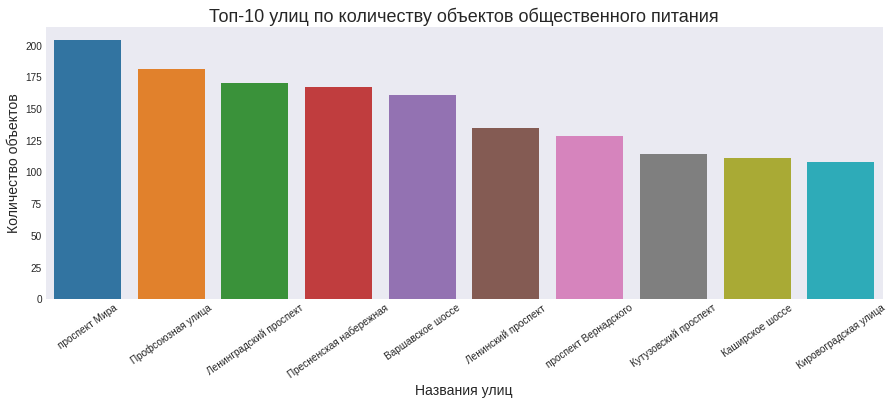

In [34]:
order_cols = list(df_streets_pivot['street'])
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'street', y = 'count', data = df_streets_pivot, order = order_cols)
ax.set_title('Топ-10 улиц по количеству объектов общественного питания', fontsize = 18)
ax.set_xlabel('Названия улиц', fontsize = 14)
ax.set_ylabel('Количество объектов', fontsize = 14)
plt.xticks(rotation = 35)

Ответим на вопрос технического задания к исследованию о количестве улиц с одним заведением.

In [35]:
df_streets_pivot = pd.pivot_table(df,
                                  index = 'street',
                                  values = 'chain',
                                  aggfunc = 'count').reset_index().sort_values(by = 'chain').query('chain == 1')
df_streets_pivot.columns = ['street', 'count']
sum(df_streets_pivot['count'])

539

В выборке найдено 539 улиц с одним заведением. Посмотрим на то, в каких районах располагаются дома номер 1 на этих улицах.

In [36]:
streets_list = list(df_streets_pivot.query('count == 1')['street'])

col = []
for street in streets_list:
    result = dadata.suggest("address", f"Москва {street} д1")
    try:
        district = result[0]['data']['divisions']['administrative']['city_district']['name']
    except:
        district = 'нет данных'
    col.append(district)
df_streets_pivot['district'] = col
df_streets_pivot[['street', 'district']].head(5)

,street,district
757,Малый Толмачёвский переулок,Якиманка
1038,Садовнический проезд,Замоскворечье
426,Винницкая улица,Раменки
1033,Садовая-Сухаревская улица,Мещанский
1643,улица Малые Каменщики,Таганский


Посмотрим сколько данных не найдено

In [37]:
df_streets_pivot.query('district == "нет данных"')

,street,count,district
1390,проектируемый проезд № 1980,1,нет данных
180,30-й километр Московской Кольцевой Автодороги,1,нет данных
146,26-й километр Московской Кольцевой Автодороги,1,нет данных
181,31-й километр Московской Кольцевой Автодороги,1,нет данных
74,104-й километр Московской Кольцевой Автодороги,1,нет данных
183,34-й километр Московской Кольцевой Автодороги,1,нет данных
184,38-й километр Московской Кольцевой Автодороги,1,нет данных
212,56-й километр Московской Кольцевой Автодороги,1,нет данных
219,67-й километр Московской Кольцевой Автодороги,1,нет данных
228,78-й километр Московской Кольцевой Автодороги,1,нет данных


Погрешность небольшая, да и улицы прямо скажем не самый понятные. Посмотрим на топ-10 районов

In [38]:
df_streets_pivot.query('district != "нет данных"').district.value_counts().head(10)

Таганский        28
Басманный        23
Хамовники        22
Тверской         21
Пресненский      18
Марьина роща     17
Сокольники       15
Замоскворечье    13
Арбат            13
Мещанский        13
Name: district, dtype: int64

Почти все в центре. Похоже тут идет речь про небольшие улицы и переулки, которые могут состоять из десятка домов.

Ответим на последний вопрос исследования - количество посадочных мест для улиц с большим количеством объектов. Составим сводную таблицу для анализа.

In [39]:
df_top_streets = df.query('street in @top_streets')
top_streets_number = pd.pivot_table(df_top_streets,
                                  index = 'street',
                                  values = 'number',
                                  columns = 'object_type',
                                  aggfunc = 'mean')
top_streets_number = round(top_streets_number)
top_streets_number

object_type,бар,буфет,закусочная,кафе,кафетерий,кулинария,ресторан,столовая,фаст фуд
street,,,,,,,,,
Варшавское шоссе,36.00,8.00,4.00,41.00,13.00,1.00,94.00,86.00,25.00
Каширское шоссе,22.00,34.00,NaN,41.00,11.00,NaN,91.00,92.00,25.00
Кировоградская улица,64.00,24.00,29.00,42.00,5.00,7.00,87.00,150.00,14.00
Кутузовский проспект,67.00,15.00,0.00,30.00,NaN,5.00,95.00,118.00,25.00
Ленинградский проспект,50.00,32.00,NaN,37.00,14.00,14.00,75.00,69.00,25.00
Ленинский проспект,25.00,250.00,4.00,38.00,9.00,NaN,99.00,78.00,23.00
Пресненская набережная,44.00,237.00,NaN,35.00,6.00,NaN,72.00,NaN,3.00
Профсоюзная улица,34.00,46.00,1.00,41.00,5.00,12.00,68.00,141.00,13.00
проспект Вернадского,18.00,44.00,30.00,40.00,18.00,6.00,105.00,129.00,35.00


Также посмотрим на количество объектов, что бы анализ был полноценным.

In [40]:
top_streets_quant = pd.pivot_table(df_top_streets,
                                  index = 'street',
                                  values = 'chain',
                                  columns = 'object_type',
                                  aggfunc = 'count')
top_streets_quant = round(top_streets_quant)
top_streets_quant

object_type,бар,буфет,закусочная,кафе,кафетерий,кулинария,ресторан,столовая,фаст фуд
street,,,,,,,,,
Варшавское шоссе,6,6,2,63,8,2,9,25,40
Каширское шоссе,2,3,0,30,8,0,9,17,42
Кировоградская улица,4,1,4,16,2,3,18,14,46
Кутузовский проспект,6,1,2,41,0,2,48,6,8
Ленинградский проспект,10,5,0,70,3,5,48,13,16
Ленинский проспект,6,1,1,62,3,0,36,17,9
Пресненская набережная,5,1,0,98,5,0,40,0,18
Профсоюзная улица,5,5,2,90,10,2,30,14,23
проспект Вернадского,4,5,2,55,3,2,19,14,24


Предметно изучим ту категрию, которая нас интересует больше всего - кафе.

Text(0, 0.5, 'Количество заведений')

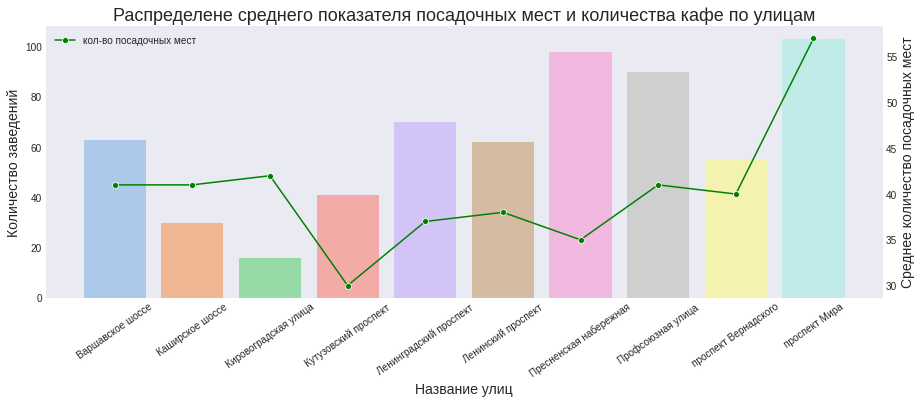

In [41]:
df_cafe = pd.DataFrame({'avg': top_streets_number['кафе'],
                        'count': top_streets_quant['кафе']}).reset_index()

fig, ax1 = plt.subplots(figsize = (15,5))
plt.xticks(rotation = 35)
ax2 = ax1.twinx()

sns.barplot(x = 'street', y = 'count', ax = ax1, data = df_cafe, palette ='pastel')
sns.lineplot(x = 'street', y = 'avg', ax = ax2, data = df_cafe, marker = 'o', color = 'green', label = 'кол-во посадочных мест')
ax2.legend(loc = 0)

ax2.set_title('Распределене среднего показателя посадочных мест и количества кафе по улицам', fontsize = 18)
ax1.set_xlabel('Название улиц', fontsize = 14)
ax2.set_ylabel('Среднее количество посадочных мест', fontsize = 14)
ax1.set_ylabel('Количество заведений', fontsize = 14)

Больше всего заведений и самое большее среднее количество посадочных мест наблюдается для кафе расположенных на Проспекте Мира. Меньшее количество мест при среднем количество заведений наблюдается на Кутузовском проспекте. Интересно также посмотреть на Пресненскую набережную, там большое количество кафе с небольшим количеством мест. 

Если соотносить расположение и показатели, можно сделать вывод, что на дорогих улицах располагаются заведения с небольшим количеством мест, а не улицах в более бедных районах большое количество заведений с большим количеством мест. 

Посмотрим теперь на рестораны.

Text(0, 0.5, 'Количество заведений')

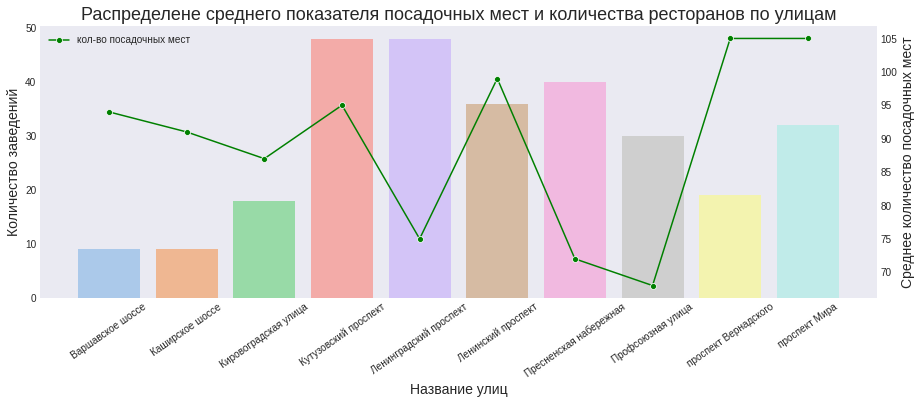

In [42]:
df_rest = pd.DataFrame({'avg': top_streets_number['ресторан'],
                        'count': top_streets_quant['ресторан']}).reset_index()

fig, ax1 = plt.subplots(figsize = (15,5))
plt.xticks(rotation = 35)
ax2 = ax1.twinx()

sns.barplot(x = 'street', y = 'count', ax = ax1, data = df_rest, palette ='pastel')
sns.lineplot(x = 'street', y = 'avg', ax = ax2, data = df_rest, marker = 'o', color = 'green', label = 'кол-во посадочных мест')
ax2.legend(loc = 0)

ax2.set_title('Распределене среднего показателя посадочных мест и количества ресторанов по улицам', fontsize = 18)
ax1.set_xlabel('Название улиц', fontsize = 14)
ax2.set_ylabel('Среднее количество посадочных мест', fontsize = 14)
ax1.set_ylabel('Количество заведений', fontsize = 14)

Ситуация с ресторанами отличается от ситуации с кафе. На Проспекте Мира также наблюдается максимальное количество посадочных мест, однако максимум по количеству видно на Кутузовском и Ленинградском проспектах. При этом на Кутузовском проспекте среднее количество мест не минимальное, а максимальное, а на Ленинградском минимальное. 

Text(0, 0.5, 'Количество заведений')

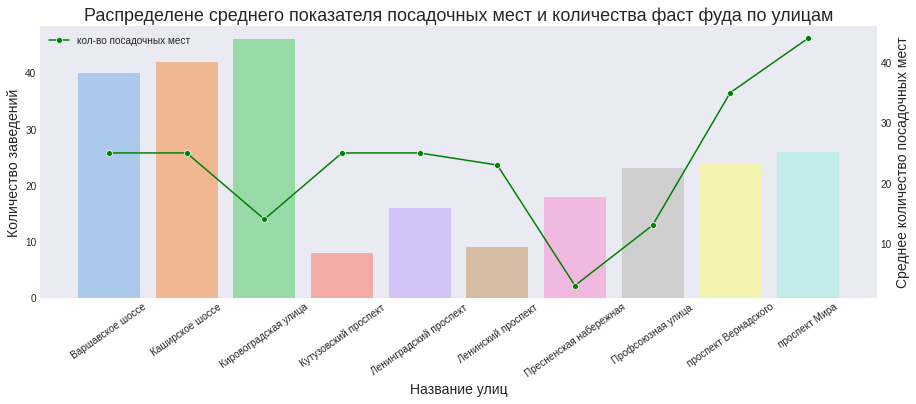

In [43]:
df_fast = pd.DataFrame({'avg': top_streets_number['фаст фуд'],
                        'count': top_streets_quant['фаст фуд']}).reset_index()

fig, ax1 = plt.subplots(figsize = (15,5))
plt.xticks(rotation = 35)
ax2 = ax1.twinx()

sns.barplot(x = 'street', y = 'count', ax = ax1, data = df_fast, palette ='pastel')
sns.lineplot(x = 'street', y = 'avg', ax = ax2, data = df_fast, marker = 'o', color = 'green', label = 'кол-во посадочных мест')
ax2.legend(loc = 0)

ax2.set_title('Распределене среднего показателя посадочных мест и количества фаст фуда по улицам', fontsize = 18)
ax1.set_xlabel('Название улиц', fontsize = 14)
ax2.set_ylabel('Среднее количество посадочных мест', fontsize = 14)
ax1.set_ylabel('Количество заведений', fontsize = 14)

Картинка похожа на рестораны, с той разницей, что наиболее популярные улицы не Кутузовский и Ленинский, а Варшавское, Каширское шоссе и Кировоградская улица, то есть более бедные районы. 

- Смотреть на столовые нет смысла, так как категория не подходит под описание заведения из технического задания 
- Остальные категории имеют слишком маленькую выборку, их некорректно сравнивать с категориями, рассмотренными выше

#### Вывод

Характеристика топ-10 улиц:
- Проспект Мира - очень длинная улица, расположенная на севере Москвы от самого центра (садового кольца) практически до МКАДа. Не удивительно, что она заняла топ-1 в рейтинге.
- Профсоюзная улица чуть по меньше, но также имеет протяженную географию - практически от центра до МКАДа на юго-западе Москвы.
- Ленинградский проспект на северо-западе Москвы расположен в оживленных и популярных районах от Белорусского вокзала до метро Сокол. 
- Все заведения расположенные на Пресненской набережной скорее всего относятся к заведениям внутри бизнес и жилого комплекса Москвы Сити
- Варшавское шоссе - самая длинная из представленных "улиц" на юге Москвы и МО, начинается от ТТК, проходит через Подольск и доходит практически до Обнинска.
- Ленинский проспект на юго-западе Москвы начинается около Садового кольца и заканчивается около МКАДа. Пролегает через большое количество спальных районов среднего уровня.
- Проспект Вернадского дублирует Ленинский проспект в том-же районе.
- Кутузовский проспект расположен на западе Москвы и проходит от Нового Арбата до Кунцевской. Популярный район среди среднего класса и выше.
- Каширское шоссе довольно удивительно видеть в этом рейтинге, улица расположена в на юго-востоке и проходит через небогатые спальные районы, промзоны и парки.
- Кировоградская улица это первая "настоящая" улица в рейтинге, расположена в районе Чертаново среди спальный районов среднего уровня вдоль Битцевского лесопарка.
- Среди рейтинга не найдены улицы расположенные в восточной части Москвы, что не удивительно. Как правило это не богатые районы с большим количеством парков и промышленных зон.
- В выборке найдено 539 улиц с одним заведением.

Изучение ресторанов, кафе и фаст-фуда на топ-10 улицах:
- Проспект мира самая длинная улица, поэтому данные на ней могут быть искажены
- Кафе больше всего на Пресненской набережной и Профсоюзной улице в среднем 35-40 посадочных мест 
- Ресторанов больше всего на Кутузовской и Ленинградском проспектах, в среднем 75 - 95 посадочных мест. Также стоит обратить внимание Пресненскую набережную, но уже с 70 посадочными местами.
- Фаст-фуда больше всего на Варшавском и Каширском шоссе, а также на Кировоградской улице. 15-30 посадочных мест в среднем.
- Смотреть на столовые нет смысла, так как категория не подходит под описание заведения из технического задания 
- Остальные категории имеют слишком маленькую выборку, их некорректно сравнивать с категориями, рассмотренными выше

## Общий вывод

Предобработка:
- Удалены значения с закрытыми заведениями
- Удалили значения, где не указано явно, что адрес находится в Москве
- Добавлен столбец `street` со значениями улиц
- Исследование по топ-10 улицам проводилось без учета Зеленограда

Исследование типов объектов:
- Более 80% всех заведений Москвы по документам значаться как кафе, столовая, ресторан или предприятие быстрого питания (фастфуд), при этом кафе больше всего - 6 тысяч заведений. 
- Сетевое распространение характернее всего для фаст-фуда, больше всего среди всех сетевых заведений кафе, фаст фуда и ресторанов.
- Соотношение не сетевых и сетевых заведений 80% на 20% соответственно.
- Для фаст фуда сетевой бизнес предпочитает открывать меньше заведений с большим количеством посадочных мест - 7 посадочных мест в среднем для не сетевых заведений и 38 для сетевых.
- Для кафе и ресторанов сетевой бизнес также предпочитает открывать точки с большим количеством мест, однако разница не столь велика, в среднем посадочных мест для сетевых точек больше на 27% и 8% соответственно. 

Изучение ресторанов, кафе и фаст-фуда на топ-10 улицах:
- Проспект мира самая длинная улица, поэтому данные на ней могут быть искажены
- Кафе больше всего на Пресненской набережной и Профсоюзной улице в среднем 35-40 посадочных мест 
- Ресторанов больше всего на Кутузовской и Ленинградском проспектах, в среднем 75 - 95 посадочных мест. Также стоит обратить внимание Пресненскую набережную, но уже с 70 посадочными местами.
- Фаст-фуда больше всего на Варшавском и Каширском шоссе, а также на Кировоградской улице. 15-30 посадочных мест в среднем.
- Смотреть на столовые нет смысла, так как категория не подходит под описание заведения из технического задания 
- Остальные категории имеют слишком маленькую выборку, их некорректно сравнивать с категориями, рассмотренными выше

## Рекомендации

Предоставленные данные не представляют возможности дать хорошую рекомендацию по выбору места или типа заведения, если конечная цель рекомендации - выбрать наиболее экономически выгодную модель. Если на улице большое количество заведений, это не значит, что заведения там прибыльны, также не очевидна корреляция между количеством посадочных мест и успешностью. Можно было бы подумать, что сети могли бы быть маркером успешного расположения и количества мест, однако в данных нет названий сетей, а определить их с помощью алгоритмов практически не представляется возможным (по крайней мере это очень сложно, в реальной ситуации проще было бы найти другие данные). 

Однако, некоторые рекомендации все же можно дать. 

Для обозначенной концепции рекомендуется выбрать **ресторан**, если концепция подразумевает создание дорого заведения или **фаст-фуд**, если выбран более дешевый ценовой сегмент. Кафе выбирать не рекомендуется, так как можно столкнуться с очень сильной конкуренцией - кафе больше всего на рынке. Столовых достаточно много, но этот формат не подходит под концепцию, также как и остальные категории

**Ресторан**

Лучше всего выбирать улицы с дорогими заведениями. Кутузовский, Ленинградский и Ленинский проспекты а также Пресненская набережная содержат большое количество заведений, что скорее хорошо для размещения, так как эти локации уже привлекают целевую аудиторию. Количество посадочных мест лучше выбирать исходя из возможностей, чем больше, тем лучше. В среднем по рынку этот показатель находится между 70 и 90. 

**Фаст-фуд**

Для этой категории лучше выбирать улицы в более бедных, но густонаселенных районах. Также рекомендуется выбрать сетевую концепцию распространения, более 50% заведений сетевые. Варшавское и Каширское шоссе, а также Кировоградская улица имеют больше всего заведений, а среднее количество мест между 15 и 30 на одну точку.

(выполнена по стандартам Я.Практикума по конкретному ТЗ)

Презентация: https://drive.google.com/file/d/1JhSgX205WiIzWDN8G9I0TtScEIxiNS0s/view?usp=sharing